In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = '/content/drive/MyDrive/cse445 project/dataset/Bank_Personal_Loan_Modelling.csv'
data_frame = pd.read_csv(data) #load and read the csv file
df= data_frame.copy() #making a copy to avoid changes to data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")
#checking the shape of the dataset
np.random.seed(85) 
df.sample(10) #loading random 10 rows

There are 5000 rows and 14 columns.


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3411,3412,63,37,118,94010,1,2.0,1,427,0,0,0,0,0
4241,4242,34,9,40,95054,4,2.0,2,0,0,0,0,1,1
2799,2800,64,39,85,94720,4,3.4,2,200,0,0,0,1,0
4132,4133,61,36,133,90266,1,2.6,1,0,0,0,0,1,0
3220,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0
1614,1615,47,23,89,94920,1,2.6,2,0,0,1,1,1,1
4992,4993,30,5,13,90037,4,0.5,3,0,0,0,0,0,0
3375,3376,43,18,88,90089,4,1.1,2,0,0,0,0,1,0
4023,4024,51,25,175,90089,3,0.7,1,312,1,0,0,0,0
793,794,24,-2,150,94720,2,2.0,1,0,0,0,0,1,0


In [ ]:
df.info() # looking at the structure of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#remove the spaces in the columns
df.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"Personal_Loan",
                        "Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)

df = df.reindex(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'CreditCard', 'Securities_Account',
       'CD_Account', 'Online', 'Personal_Loan'], axis =1 )


In [ ]:
# checking the number of uniques in the zip code
df['ZIPCode'].nunique()

467

In [ ]:
df['ZIPCode'] = df['ZIPCode'].astype(str)
df['ZIPCode'] = df['ZIPCode'].str[0:2]
df['ZIPCode'].nunique()

7

In [ ]:
## to see null value
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
CreditCard            0
Securities_Account    0
CD_Account            0
Online                0
Personal_Loan         0
dtype: int64

In [ ]:
df.isna().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIPCode               False
Family                False
CCAvg                 False
Education             False
Mortgage              False
CreditCard            False
Securities_Account    False
CD_Account            False
Online                False
Personal_Loan         False
dtype: bool

In [ ]:
df.Personal_Loan.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


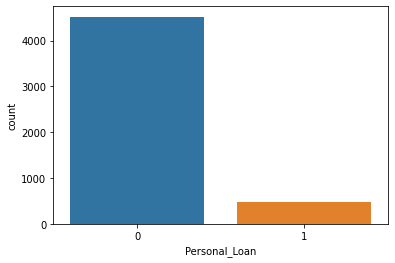

In [ ]:
sns.countplot(df.Personal_Loan,data=df)
plt.show()

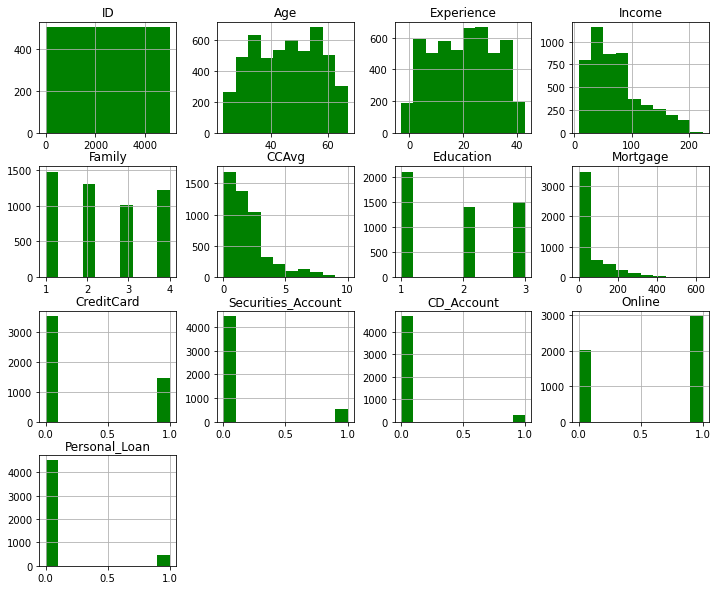

In [ ]:
df.hist(figsize = (12,10),color = 'green')
plt.show()

# Model Building

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Utility function

In [ ]:
#Defining a function for Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
sns.set(font_scale=2.0) # to set font size for the matrix
def make_confusion_matrix(y_actual,y_predict):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix(y_actual,y_predict)
    group_names = ['True -ve','False +ve','False -ve','True +ve']
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2,v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(cm, annot=labels,fmt='',cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def metrics_score(y_train, y_test, pred_train, pred_test):
  #Checking the Accuracy of the model:
  print('\nAccuracy on train data:%.6f'%accuracy_score(y_train, pred_train) )
  print('Accuracy on test data:%.6f' %accuracy_score(y_test, pred_test))
  #checking the Recall metrics of the model:
  print('\nRecall on train data:%.6f'%recall_score(y_train, pred_train) )
  print('Recall on test data:%.6f'%recall_score(y_test, pred_test))
  #checking the Precision metrics of model:
  print("\nPrecision on training set : ",precision_score(y_train, pred_train))
  print("Precision on test set : ",precision_score(y_test, pred_test))

  print("\nF1 Score on training set : ",f1_score(y_train, pred_train))
  print("F1 Score on test set : ",f1_score(y_test, pred_test))

In [ ]:
X = df.iloc[:,:13]
Y = df.iloc[:,13]

In [ ]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(X)

In [ ]:
pd.DataFrame(standardized_data,columns=['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'CreditCard', 'Securities_Account',
       'CD_Account', 'Online']).head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online
0,-1.731704,-1.774417,-1.666078,-0.538229,-1.057687,1.397414,-0.193385,-1.049078,-0.555524,-0.645314,2.928915,-0.25354,-1.216618
1,-1.731012,-0.029524,-0.096330,-0.864109,-1.645617,0.525991,-0.250611,-1.049078,-0.555524,-0.645314,2.928915,-0.25354,-1.216618
2,-1.730319,-0.552992,-0.445163,-1.363793,0.706104,-1.216855,-0.536736,-1.049078,-0.555524,-0.645314,-0.341423,-0.25354,-1.216618
3,-1.729626,-0.901970,-0.968413,0.569765,0.706104,-1.216855,0.436091,0.141703,-0.555524,-0.645314,-0.341423,-0.25354,-1.216618
4,-1.728933,-0.901970,-1.055621,-0.625130,-1.057687,1.397414,-0.536736,0.141703,-0.555524,1.549632,-0.341423,-0.25354,-1.216618


In [ ]:
train_x,test_x,train_y,test_y = train_test_split(standardized_data,Y,test_size = 0.3,random_state = 32)

In [ ]:
print("Shape of train x: ",train_x.shape)
print("Shape of train y: ",train_y.shape)

print("Shape of test x: ",test_x.shape)
print("Shape of test y: ",test_y.shape)

Shape of train x:  (3500, 13)
Shape of train y:  (3500,)
Shape of test x:  (1500, 13)
Shape of test y:  (1500,)


# SVM model

In [ ]:
# defining our model
model = SVC()
model.fit(train_x,train_y)

SVC()

In [ ]:
# training accuracy
X_train_predicted = model.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

Accuracy of training data is:  0.9808571428571429


In [ ]:
# prediction for test data
predicted = model.predict(test_x)

In [ ]:
svm_test_score = accuracy_score(test_y,predicted)
svm_test_score

0.9653333333333334

In [ ]:
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1352
           1       0.97      0.67      0.79       148

    accuracy                           0.97      1500
   macro avg       0.97      0.83      0.89      1500
weighted avg       0.97      0.97      0.96      1500



In [ ]:
confusion_matrix(test_y,predicted)

array([[1349,    3],
       [  49,   99]])

In [ ]:
metrics_score(train_y, test_y, X_train_predicted, predicted)


Accuracy on train data:0.980857
Accuracy on test data:0.965333

Recall on train data:0.816265
Recall on test data:0.668919

Precision on training set :  0.9783393501805054
Precision on test set :  0.9705882352941176

F1 Score on training set :  0.8899835796387521
F1 Score on test set :  0.792


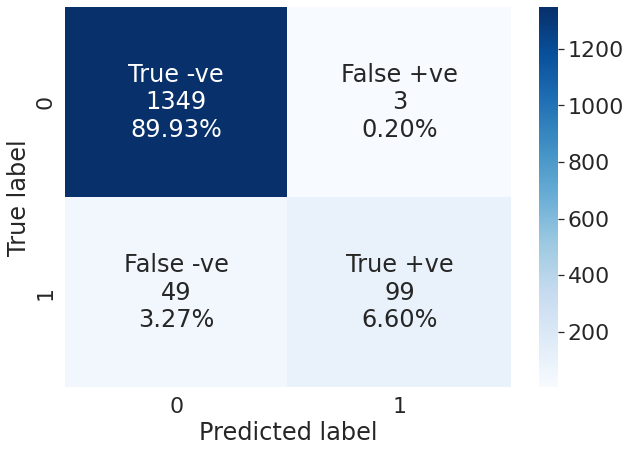

In [ ]:
make_confusion_matrix(test_y, predicted) #display confusion matrix for test set

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
lr.fit(train_x,train_y)

LogisticRegression()

In [ ]:
# training accuracy
X_train_predicted = lr.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

Accuracy of training data is:  0.9548571428571428


In [ ]:
# prediction for test data
predicted = lr.predict(test_x)
lr_test_score = accuracy_score(test_y,predicted)
lr_test_score

0.944

In [ ]:
metrics_score(train_y, test_y, X_train_predicted, predicted)


Accuracy on train data:0.954857
Accuracy on test data:0.944000

Recall on train data:0.644578
Recall on test data:0.614865

Precision on training set :  0.84251968503937
Precision on test set :  0.7711864406779662

F1 Score on training set :  0.7303754266211604
F1 Score on test set :  0.6842105263157895


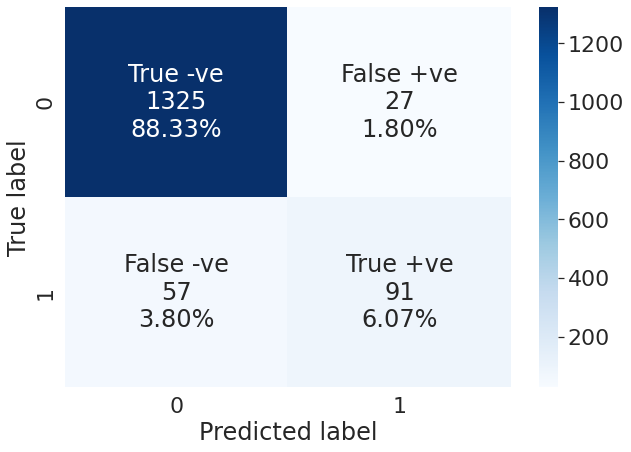

In [ ]:
make_confusion_matrix(test_y, predicted) #display confusion matrix for test set

In [ ]:
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1352
           1       0.77      0.61      0.68       148

    accuracy                           0.94      1500
   macro avg       0.86      0.80      0.83      1500
weighted avg       0.94      0.94      0.94      1500



In [ ]:
confusion_matrix(test_y,predicted)

array([[1325,   27],
       [  57,   91]])

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 50, max_depth = 5, max_leaf_nodes = 66,max_samples = 66)
#changing max_depth = 5 increases recall on
rf.fit(train_x,train_y)

RandomForestClassifier(max_depth=5, max_leaf_nodes=66, max_samples=66,
                       n_estimators=50)

In [ ]:
# training accuracy
X_train_predicted = rf.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

Accuracy of training data is:  0.9291428571428572


In [ ]:
# prediction for test data
predicted = rf.predict(test_x)
rf_test_score = accuracy_score(test_y,predicted)
rf_test_score

0.9166666666666666

In [ ]:
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1352
           1       1.00      0.16      0.27       148

    accuracy                           0.92      1500
   macro avg       0.96      0.58      0.61      1500
weighted avg       0.92      0.92      0.89      1500



In [ ]:
confusion_matrix(test_y,predicted)

array([[1352,    0],
       [ 121,   27]])

In [ ]:
metrics_score(train_y, test_y, X_train_predicted, predicted)


Accuracy on train data:0.929143
Accuracy on test data:0.916667

Recall on train data:0.253012
Recall on test data:0.155405

Precision on training set :  1.0
Precision on test set :  1.0

F1 Score on training set :  0.4038461538461538
F1 Score on test set :  0.26900584795321636


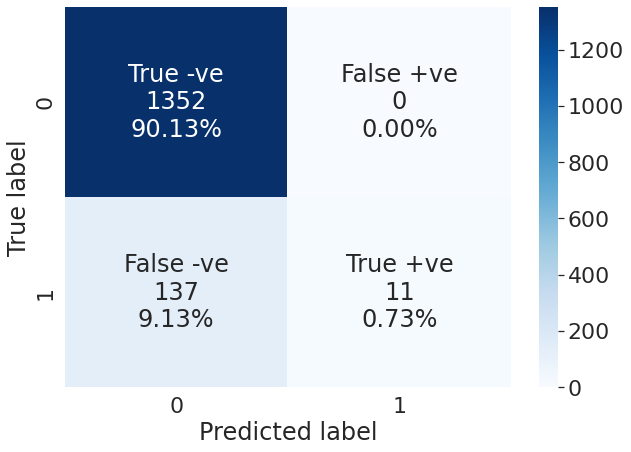

In [ ]:
make_confusion_matrix(test_y, predicted) #display confusion matrix for test set

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',min_samples_split = 6, min_samples_leaf = 25)
dt.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=25,
                       min_samples_split=6)

In [ ]:
# training accuracy
X_train_predicted = dt.predict(train_x)
print("Accuracy of training data is: ",accuracy_score(train_y,X_train_predicted))

Accuracy of training data is:  0.9814285714285714


In [ ]:
# prediction for test data
predicted = dt.predict(test_x)
dt_test_score = accuracy_score(test_y,predicted)
dt_test_score

0.9826666666666667

In [ ]:
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1352
           1       0.94      0.89      0.91       148

    accuracy                           0.98      1500
   macro avg       0.96      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



In [ ]:
confusion_matrix(test_y,predicted)

array([[1343,    9],
       [  17,  131]])

In [ ]:
metrics_score(train_y, test_y, X_train_predicted, predicted)


Accuracy on train data:0.981429
Accuracy on test data:0.982667

Recall on train data:0.885542
Recall on test data:0.885135

Precision on training set :  0.9158878504672897
Precision on test set :  0.9357142857142857

F1 Score on training set :  0.9004594180704442
F1 Score on test set :  0.9097222222222222


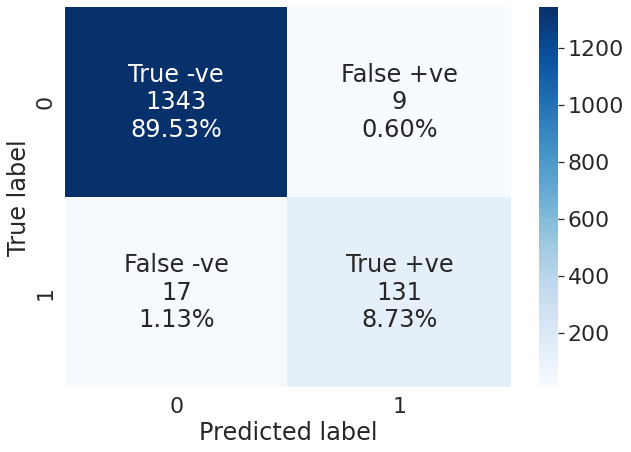

In [ ]:
make_confusion_matrix(test_y, predicted) #display confusion matrix for test set

In [ ]:
## Performing cross validation for hyperparamter tunning of DecisionTreeClassifier model.
from sklearn.model_selection import GridSearchCV
param_test = {
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf' :[2,3,4,5]
}
tree_cv = GridSearchCV(estimator= DecisionTreeClassifier(),
                             param_grid = param_test,scoring='f1',
                             n_jobs=-1,cv=5)
tree_cv.fit(train_x,train_y)
## This best score is the mean of five cross validation folds with the best hyperparamters. 
print(tree_cv.best_params_, tree_cv.best_score_)
y_pred = tree_cv.predict(test_x)
print(classification_report(y_true=test_y,y_pred=y_pred))
print("F1 score : {:.3f}".format(f1_score(y_true=test_y,y_pred=y_pred,average='macro')))

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 4} 0.9034021763213392
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1352
           1       0.98      0.89      0.93       148

    accuracy                           0.99      1500
   macro avg       0.98      0.94      0.96      1500
weighted avg       0.99      0.99      0.99      1500

F1 score : 0.961


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = [1,2,3,5,7,9,10,12,15,19,21]
test_scores = []
train_scores = []

for i in neighbors:

    knn = KNeighborsClassifier(i)
    knn.fit(train_x,train_y)
    
    train_scores.append(knn.score(train_x,train_y))
    test_scores.append(knn.score(test_x,test_y))

In [ ]:
ind=np.argmax(test_scores)

In [ ]:
# coressponding train and test scores
print("neighbour: ", neighbors[ind])
print("Test score: ",test_scores[ind])
print("Train score: ",train_scores[ind])

neighbour:  5
Test score:  0.948
Train score:  0.9634285714285714


In [ ]:
# prediction for test data
predicted = knn.predict(test_x)
knn_test_score = accuracy_score(test_y,predicted)
knn_test_score

0.9326666666666666

In [ ]:
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1352
           1       0.90      0.36      0.51       148

    accuracy                           0.93      1500
   macro avg       0.92      0.68      0.74      1500
weighted avg       0.93      0.93      0.92      1500



In [ ]:
confusion_matrix(test_y,predicted)

array([[1346,    6],
       [  95,   53]])

In [ ]:
metrics_score(train_y, test_y, X_train_predicted, predicted)


Accuracy on train data:0.928571
Accuracy on test data:0.932667

Recall on train data:0.246988
Recall on test data:0.358108

Precision on training set :  1.0
Precision on test set :  0.8983050847457628

F1 Score on training set :  0.3961352657004831
F1 Score on test set :  0.5120772946859904


In [ ]:
# comparing our all models
models = {"SVM":svm_test_score, "Logistic Regression":lr_test_score,"Random Forest":rf_test_score,"Decision Tree": dt_test_score,
         "KNN":knn_test_score}
model = pd.DataFrame({"Models":['SVM',"Logistic Regression","Random Forest","Decision Tree","KNN"],
                     "Score":[svm_test_score,lr_test_score,rf_test_score,dt_test_score,knn_test_score]},index = np.arange(1,6))
model.head(5)

,Models,Score
1,SVM,0.965333
2,Logistic Regression,0.944000
3,Random Forest,0.908667
4,Decision Tree,0.982667
5,KNN,0.932667


In [ ]:
model.sort_values(by='Score',ascending = False)
## Decision Tree is our best model

,Models,Score
4,Decision Tree,0.982667
1,SVM,0.965333
2,Logistic Regression,0.944000
5,KNN,0.932667
3,Random Forest,0.908667
